In [2]:
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import contextily as ctx

/home/giacomo/miniconda3/envs/aree-protette/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
pd.options.display.max_rows = 10

In [4]:
hv.notebook_extension('matplotlib')
%output backend='matplotlib'

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Data

In [5]:
data_dir = os.path.join(os.getcwd(), 'data')
print(data_dir)

/home/giacomo/repos/aree-protette/data


Administrative boundaries

> Source: Regione Toscana – [Limiti amministrativi](http://dati.toscana.it/dataset/amb-amm).
>
> License: [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).

[Sites of Community Importance](https://en.wikipedia.org/wiki/Site_of_Community_Importance)

> Source: Regione Toscana – [Siti di Interesse Regionale, Siti di Importanza Comunitaria, Zone di Protezione Speciale](http://dati.toscana.it/dataset/sir).
>
> License: [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/).

## Administrative boundaries

The administrative boundaries of Tuscany can be found on the [OpenToscana](http://dati.toscana.it/dataset/amb-amm) portal.

We read the shapefile `am_prov_multipart.shp` with geopandas to obtain a `GeoDataFrame`.

In [6]:
gdf = gpd.read_file(os.path.join(data_dir, 'limiti_amministrativi', 'am_prov_multipart.shp'))

The first thing to do when we have a `GeoDataFrame` is to check the Coordinate Reference System (CRS).

CRS are important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

According to the documentation for this dataset, this shapefile follows the CRS [Gauss-Boaga Fuso Ovest](https://en.wikipedia.org/wiki/Gauss%E2%80%93Boaga_projection), also known as [EPSG:3003](http://spatialreference.org/ref/epsg/3003/).

However, it seems that this information is not stored in our `GeoDataFrame`.

In [7]:
gdf.crs

{}

No big deal, we can set a CRS very easily. Geopandas accepts [lots of representations of CRS](http://geopandas.org/projections.html). Here is a very convenient one:

In [8]:
gdf.crs = {'init': 'epsg:3003', 'no_defs': True}

Let's make a quick plot with geopandas.

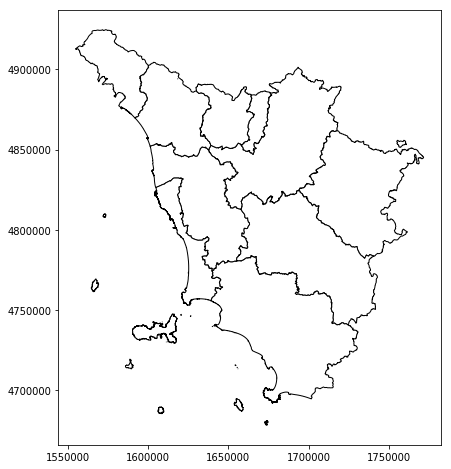

In [11]:
gdf.plot(figsize=(8, 8), facecolor='w', edgecolor='k')

Tuscany is divided into 9 provinces and 1 metropolitan area (Città Metropolitana di Firenze), so we expect to find 10 records in this `GeoDataFrame`.

In [12]:
gdf

AREA     PERIMETER CODPROV           NOME SIGLA  \
0   1.155513e+09  231968.85292   09045  MASSA-CARRARA    MS   
1   3.513302e+09  476895.78826   09048        FIRENZE    FI   
2   1.239966e+03     176.97105   08036         MODENA    MO   
3   3.655308e+08  132617.07316   09100          PRATO    PO   
4   3.233183e+09  420997.68228   09051         AREZZO    AR   
..           ...           ...     ...            ...   ...   
6   3.821605e+09  443062.40980   09052          SIENA    SI   
7   1.212215e+09  637492.01818   09049        LIVORNO    LI   
8   4.503636e+09  555370.18463   09053       GROSSETO    GR   
9   1.773222e+09  238285.85897   09046          LUCCA    LU   
10  9.645892e+08  192353.87465   09047        PISTOIA    PT   

                                             geometry  
0   POLYGON ((1583792.19 4885200, 1583787.75 48852...  
1   POLYGON ((1654770.35 4836135.04, 1654766.81 48...  
2   POLYGON ((1618381.470312714 4894014.301797042,...  
3   POLYGON ((1661595.37 4855085.89, 1661604.75 48...  
4   (POLYGON ((1749833.17843158 4821732.139672606,...  
..                                                ...  
6   POLYGON ((1731789.06998404 4785386.15, 1731795...  
7   (POLYGON ((1637289.748017652 4756404.762281807...  
8   (POLYGON ((1673102.52 4701600, 1673102.5 47016...  
9   POLYGON ((1633084.751228097 4861294.461285369,...  
10  POLYGON ((1633140.61 4860914.1, 1633139.71 486...  

[11 rows x 6 columns]

Hey, wait a minute! Modena is not in Tuscany! It's in Emilia-Romagna. What's going in on here?

## A small exclave of Emilia-Romagna in Tuscany

Modena has a small [exclave](https://en.wikipedia.org/wiki/Enclave_and_exclave) in Tuscany.

In [13]:
modena_exclaves_in_tuscany = gpd.sjoin(gdf[gdf.NOME == 'MODENA'], gdf[gdf.NOME != 'MODENA'], how='left')
modena_exclaves_in_tuscany

AREA_left  PERIMETER_left CODPROV_left NOME_left SIGLA_left  \
2  1239.96639       176.97105        08036    MODENA         MO   

                                            geometry  index_right  \
2  POLYGON ((1618381.470312714 4894014.301797042,...            9   

     AREA_right  PERIMETER_right CODPROV_right NOME_right SIGLA_right  
2  1.773222e+09     238285.85897         09046      LUCCA          LU

Thanks to the spatial join we found out that this exclave of Modena is enclosed by the territory of Lucca.

After a quick search I found out that there is indeed a small town in the mountains, split between the provinces Lucca and Modena: [San Pellegrino in Alpe](https://it.wikipedia.org/wiki/San_Pellegrino_in_Alpe).

As you can see from the data, it's a very small territory:

In [14]:
san_pellegrino_in_alpe = gpd.GeoSeries(modena_exclaves_in_tuscany.iloc[0], 
                                       crs={'init': 'epsg:3003', 'no_defs': True},
                                       name='San Pellegrino in Alpe')
print(f'Perimeter: {san_pellegrino_in_alpe.PERIMETER_left:.2f} m')
print(f'Area: {san_pellegrino_in_alpe.AREA_left:.2f} m\u00B2')

Perimeter: 176.97 m
Area: 1239.97 m²


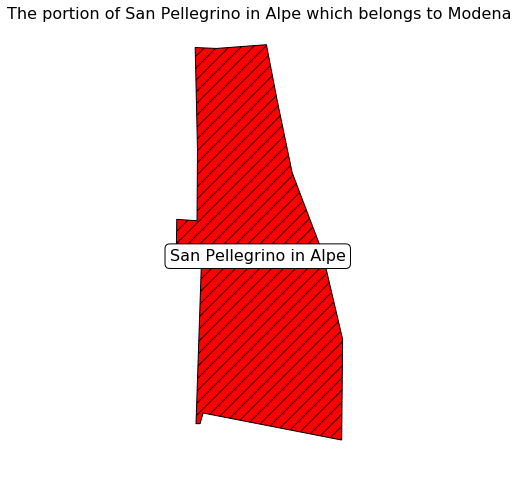

In [15]:
centroid = gdf[gdf.NOME == 'MODENA'].geometry.centroid.bounds

bbox = dict(boxstyle='round', facecolor='white', alpha=1.0)
ax = san_pellegrino_in_alpe.plot(figsize=(8, 8), alpha=1.0, facecolor='red', edgecolor='k', hatch='//')
ax.text(x=centroid.minx, y=centroid.miny, s=san_pellegrino_in_alpe.name,
        horizontalalignment='center', fontsize=16, bbox=bbox)
ax.set_axis_off()
ax.set_title('The portion of San Pellegrino in Alpe which belongs to Modena', fontsize=16);

Try to spot San Pellegrino in Alpe in the entire Province of Lucca (I increased `linewidth` to make it easier to find).

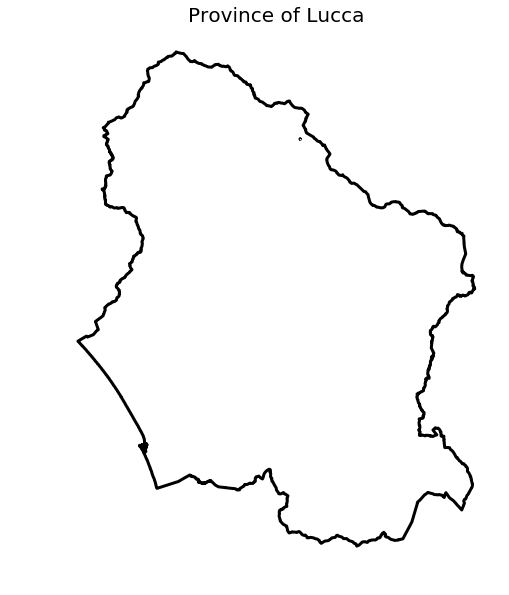

In [16]:
ax = gdf[gdf.NOME.isin(['LUCCA', 'MODENA'])].plot(figsize=(10, 10), facecolor='w', edgecolor='k', linewidth=3)
ax.set_axis_off()
ax.set_title('Province of Lucca', fontsize=20);

## Tidy up the `GeoDataframe`

Remove the small exclave, reset the index, and drop the columns that we don't need.

`CODPROV` should be a code assigned by [ISTAT](https://www.istat.it/it/archivio/6789) to a given province. We don't need it, so we drop it.

`AREA` and `PERIMETER` can be computed from `geometry`, so we drop them too.

In [17]:
cmap = mpl.cm.get_cmap('tab10')
rgba_colors = [cmap(i) for i in range(cmap.N)]
hex_colors = [mpl.colors.rgb2hex(rgba[:3]) for rgba in rgba_colors]

In [18]:
tuscany = gdf[gdf.NOME != 'MODENA']\
    .reset_index(drop=True)\
    .drop(columns=['CODPROV', 'SIGLA', 'AREA', 'PERIMETER'])\
    .rename(columns={'NOME': 'province'})

In [19]:
[(col, prov) for col, prov in zip(hex_colors, sorted([province for province in tuscany.province]))]

[('#1f77b4', 'AREZZO'),
 ('#ff7f0e', 'FIRENZE'),
 ('#2ca02c', 'GROSSETO'),
 ('#d62728', 'LIVORNO'),
 ('#9467bd', 'LUCCA'),
 ('#8c564b', 'MASSA-CARRARA'),
 ('#e377c2', 'PISA'),
 ('#7f7f7f', 'PISTOIA'),
 ('#bcbd22', 'PRATO'),
 ('#17becf', 'SIENA')]

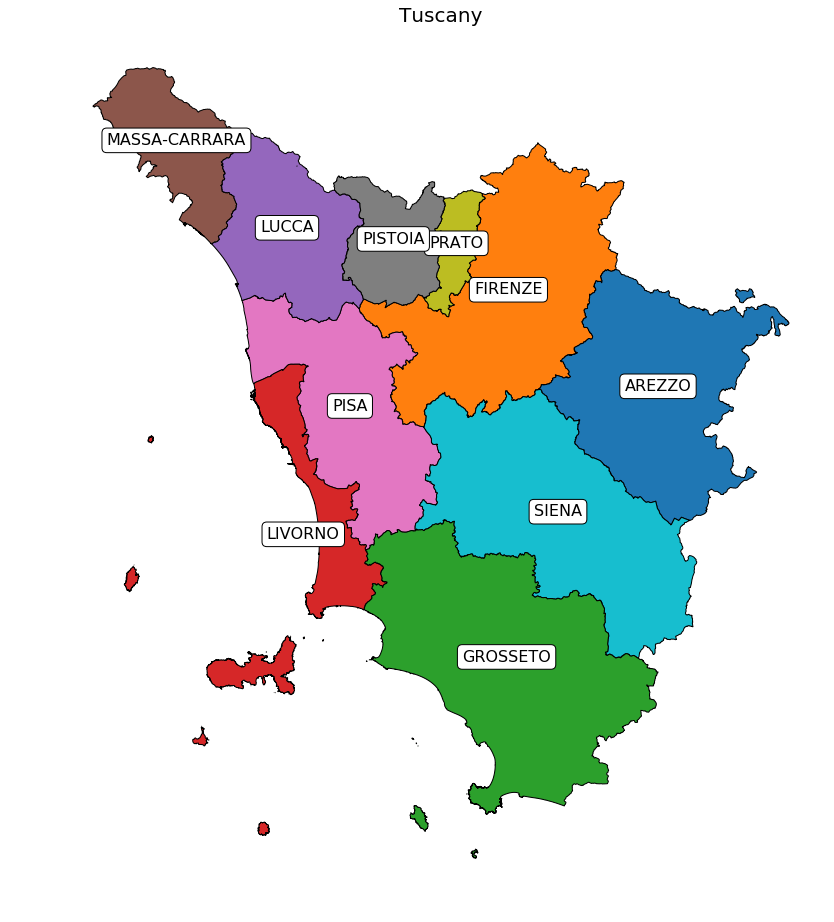

In [20]:
bbox = dict(boxstyle='round', facecolor='white', alpha=1.0)
ax = tuscany.plot(figsize=(16, 16), column='province', alpha=1.0, edgecolor='k', cmap='tab10')
for i, row in tuscany.iterrows():
    centroid = row.geometry.centroid.bounds
    ax.text(x=centroid[0], y=centroid[1], s=row.province, horizontalalignment='center', fontsize=16, bbox=bbox)
ax.set_axis_off()
ax.set_title('Tuscany', fontsize=20);

## Territories

The territory of the Metropolitan City of Florence is homogeneous:

In [21]:
exploded = tuscany[tuscany.province == 'FIRENZE'].explode().reset_index(drop=True)
len(exploded)

1

While the Provinces of Livorno and Grosseto comprise of many territories, including the islands of the [Tuscan Archipelago](https://en.wikipedia.org/wiki/Tuscan_Archipelago).

In [22]:
exploded = tuscany[tuscany.province == 'LIVORNO'].explode().reset_index(drop=True)
livorno = gpd.GeoDataFrame({'geometry': exploded, 'area': exploded.area, 'province': 'Livorno'},
                           crs=exploded.crs)

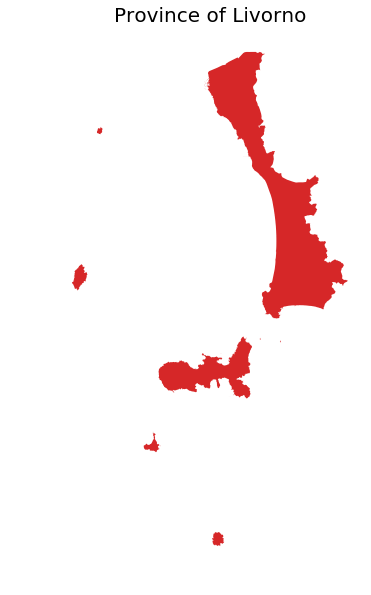

In [23]:
ax = livorno.plot(figsize=(10, 10), facecolor='#d62728')
ax.set_axis_off()
ax.set_title('Province of Livorno', fontsize=20);

In [24]:
exploded = tuscany[tuscany.province == 'GROSSETO'].explode().reset_index(drop=True)
grosseto = gpd.GeoDataFrame({'geometry': exploded, 'area': exploded.area, 'province': 'Grosseto'},
                            crs=exploded.crs)

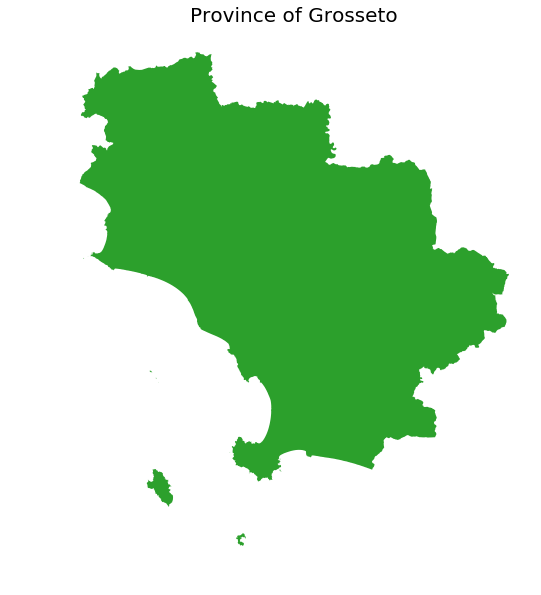

In [25]:
ax = grosseto.plot(figsize=(10, 10), facecolor='#2ca02c')
ax.set_axis_off()
ax.set_title('Province of Grosseto', fontsize=20);

## The Tuscan Archipelago

The Tuscan Archipelago includes 7 major islands. 2 belong to the Province of Grosseto, 5 to the Province of Livorno.

In [26]:
islands_livorno = livorno.sort_values(by='area', ascending=False).iloc[1:6].reset_index(drop=True)
islands_livorno['nome'] = ['Elba', 'Capraia', 'Montecristo', 'Pianosa', 'Gorgona']

In [27]:
islands_grosseto = grosseto.sort_values(by='area', ascending=False).iloc[1:3].reset_index(drop=True)
islands_grosseto['nome'] = ['Giglio', 'Giannutri']

In [28]:
islands = pd.concat([islands_livorno, islands_grosseto])

In [29]:
def make_island(gs, crs):
    """Create a GeoViews Shape from a GeoPandas GeoSeries and a Cartopy CRS."""
    facecolor = '#d62728' if gs.province == 'Livorno' else '#2ca02c'
    style = {'facecolor': facecolor, 'edgecolor': 'black', 'alpha': 1.0}
    return gv.Shape(gs.geometry, crs=crs).opts(style=style)

Here are the 7 islands sorted by area.

:Layout
   .Shape.Elba        :Shape   [Longitude,Latitude]   (Level)
   .Shape.Capraia     :Shape   [Longitude,Latitude]   (Level)
   .Shape.Montecristo :Shape   [Longitude,Latitude]   (Level)
   .Shape.Pianosa     :Shape   [Longitude,Latitude]   (Level)
   .Shape.Gorgona     :Shape   [Longitude,Latitude]   (Level)
   .Shape.Giglio      :Shape   [Longitude,Latitude]   (Level)
   .Shape.Giannutri   :Shape   [Longitude,Latitude]   (Level)
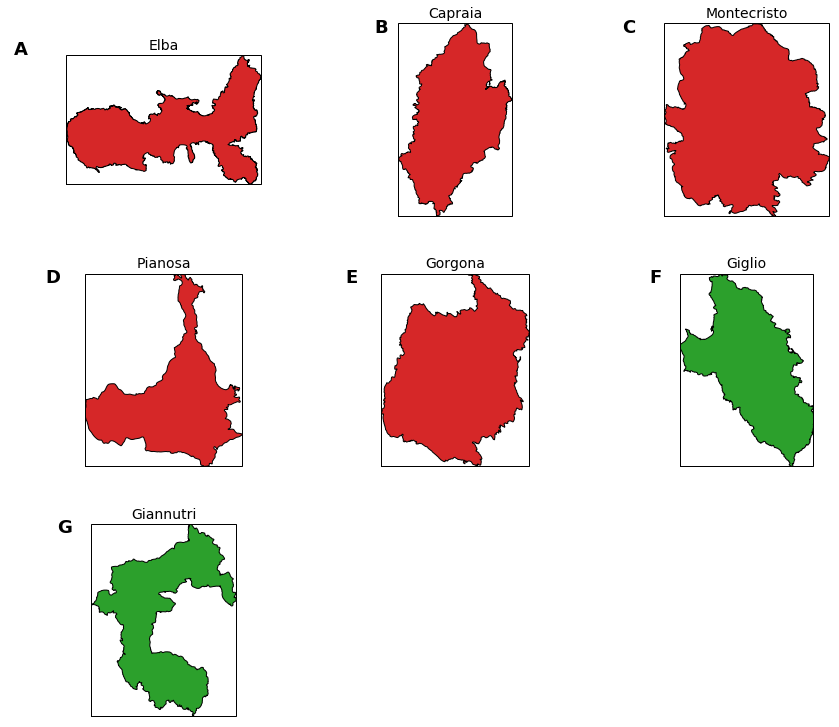

In [30]:
%%opts Layout [fig_rcparams={'axes.titlesize': 14}]
hv.Layout(
    [make_island(gs, crs=ccrs.epsg(code=3003)).relabel(label=gs.nome) for (i, gs) in islands.iterrows()]
).cols(3)

## Siti di Importanza Comunitaria (SIC)

See: [Sites of community importance](https://en.wikipedia.org/wiki/Site_of_Community_Importance).

In [32]:
sic = gpd.read_file(os.path.join(data_dir, 'sir', 'rt_arprot.idnat2000_sic.rt.poly.shp'))

INFO:Fiona:Failed to auto identify EPSG: 7


First of all we need to check that the Coordinate Reference System of the two datasets (administrative boundaries and SIC) is the same.

In [33]:
sic.crs

{'proj': 'tmerc',
 'lat_0': 0,
 'lon_0': 9,
 'k': 0.9996,
 'x_0': 1500000,
 'y_0': 0,
 'ellps': 'intl',
 'units': 'm',
 'no_defs': True}

It's a different CRS, so we re-project to a Gauss–Boaga projection.

In [34]:
sic = sic.to_crs(epsg=3003)

In [35]:
sic.crs

{'init': 'epsg:3003', 'no_defs': True}

In [36]:
sic.columns

Index(['AREA', 'PERIMETER', 'GEOMETRIA', 'COD_SIR', 'NAT2000', 'NOME',
       'CODPREC', 'BIOPREC', 'NOMPREC', 'REE', 'CLAS', 'TIPO', 'ZONA',
       'RBIOGEOSIC', 'DESIGN_ZSC', 'DECR_ZSC', 'NOTE', 'geometry'],
      dtype='object')

In [37]:
sic.head()

AREA     PERIMETER GEOMETRIA COD_SIR    NAT2000  \
0  5.232224e+06  22284.662511         A       1  IT5110001   
1  6.619993e+06  26200.139136         A      10  IT5120002   
2  8.299227e+06  24061.527311         A     100  IT5190014   
3  1.402896e+07  23292.841970         A     101  IT51A0001   
4  1.061243e+07  26582.591097         A     102  IT51A0002   

                         NOME CODPREC    BIOPREC                     NOMPREC  \
0  Valle del torrente Gordana       1  IT5110001  Valle del torrente Gordana   
1  M. Castellino - Le Forbici      10  IT5120002  M. Castellino - Le Forbici   
2                Ripa d'Orcia     100  IT5180014                Ripa d'Orcia   
3            Cornate e Fosini     101  IT5190001            Cornate e Fosini   
4              Poggi di Prata     102  IT5190002              Poggi di Prata   

  REE CLAS TIPO ZONA RBIOGEOSIC DESIGN_ZSC         DECR_ZSC  NOTE  \
0  SI    6  ZSC   ZT          M         SI  D.M. 24-05-2016  None   
1  SI    6  ZSC   ZT          C         SI  D.M. 22-12-2016  None   
2  SI    6  ZSC   ZT          M         SI  D.M. 24-05-2016  None   
3  SI    6  ZSC   ZT          M         SI  D.M. 24-05-2016  None   
4  SI    6  ZSC   ZT          M         SI  D.M. 24-05-2016  None   

                                            geometry  
0  POLYGON ((1567136.862654074 4912382.994853617,...  
1  POLYGON ((1613882.96029622 4898048.668175452, ...  
2  POLYGON ((1711081.990001483 4766633.519997375,...  
3  POLYGON ((1660919.122618237 4779244.817308345,...  
4  POLYGON ((1661615.620000365 4773518.119999464,...

In [38]:
sic.REE.unique()

array(['SI', 'NO'], dtype=object)

In [39]:
sic.CLAS.unique()

array(['6', '2', '3'], dtype=object)

In [40]:
sic.TIPO.unique()

array(['ZSC', 'pSIC', 'SIC'], dtype=object)

Some sites of Community importance are marine areas (ZM, *Zona di Mare*). Some others are land areas (ZT, *Zona di Terra*).

In [41]:
sic.ZONA.unique()

array(['ZT', 'ZM'], dtype=object)

In [42]:
sic.DESIGN_ZSC.unique()

array(['SI', 'NO'], dtype=object)

We don't need many of these columns, so we can drop them. Note that `GEOMETRIA` was in the original dataset and has nothing to do with the `geometry` column assigned by Geopandas.

In [43]:
sic = sic.drop(columns=['AREA', 'PERIMETER', 'GEOMETRIA', 'DECR_ZSC', 'NOTE'])

In [44]:
sic.shape

(94, 13)

We can perform a spatial join between the Provinces and the Sites of Community Importance.

In [45]:
merged = gpd.sjoin(sic, gdf, how='inner', op='intersects')\
    .rename(columns={'NOME_left': 'SIC', 'NOME_right': 'Province'})
merged.shape

(118, 19)

Sites of Community importance can be shared between two or more provinces. We can see that Lucca and Pisa share some of there regions.

In [46]:
sic_lucca = gpd.sjoin(sic, gdf[gdf.NOME == 'LUCCA'], how='inner', op='intersects').drop(columns=['index_right'])

In [47]:
sic_pisa = gpd.sjoin(sic, gdf[gdf.NOME == 'PISA'], how='inner', op='intersects').drop(columns=['index_right'])

In [48]:
gpd.sjoin(sic_lucca, sic_pisa, how='inner', op='intersects')

COD_SIR_left NAT2000_left                 NOME_left_left CODPREC_left  \
57          B03    IT5120101  Ex alveo del Lago di Bientina          B03   
79           27    IT5120019                   Monte Pisano           27   
57          B03    IT5120101  Ex alveo del Lago di Bientina          B03   
79           27    IT5120019                   Monte Pisano           27   

   BIOPREC_left                              NOMPREC_left REE_left CLAS_left  \
57    IT5120101  Bosco di Tanali e Bottaccio della Visona       SI         6   
79    IT5120019                              Monte Pisano       SI         6   
57    IT5120101  Bosco di Tanali e Bottaccio della Visona       SI         6   
79    IT5120019                              Monte Pisano       SI         6   

   TIPO_left ZONA_left     ...     CLAS_right TIPO_right ZONA_right  \
57       ZSC        ZT     ...              6        ZSC         ZT   
79       ZSC        ZT     ...              6        ZSC         ZT   
57       ZSC        ZT     ...              6        ZSC         ZT   
79       ZSC        ZT     ...              6        ZSC         ZT   

    RBIOGEOSIC_right  DESIGN_ZSC_right    AREA_right PERIMETER_right  \
57                 M                SI  2.445896e+09      381587.117   
79                 M                SI  2.445896e+09      381587.117   
57                 M                SI  2.445896e+09      381587.117   
79                 M                SI  2.445896e+09      381587.117   

   CODPROV_right  NOME_right_right SIGLA_right  
57         09050              PISA          PI  
79         09050              PISA          PI  
57         09050              PISA          PI  
79         09050              PISA          PI  

[4 rows x 36 columns]

In [49]:
set(merged[merged.Province == 'LUCCA'].SIC).intersection(set(merged[merged.Province == 'PISA'].SIC))

{'Ex alveo del Lago di Bientina', 'Monte Pisano'}

In [50]:
merged[merged.SIC == 'Monte Pisano']

COD_SIR    NAT2000           SIC CODPREC    BIOPREC       NOMPREC REE CLAS  \
79      27  IT5120019  Monte Pisano      27  IT5120019  Monte Pisano  SI    6   
79      27  IT5120019  Monte Pisano      27  IT5120019  Monte Pisano  SI    6   

   TIPO ZONA RBIOGEOSIC DESIGN_ZSC  \
79  ZSC   ZT          M         SI   
79  ZSC   ZT          M         SI   

                                             geometry  index_right  \
79  POLYGON ((1630170.310000119 4846435.619999839,...            9   
79  POLYGON ((1630170.310000119 4846435.619999839,...            5   

            AREA     PERIMETER CODPROV Province SIGLA  
79  1.773222e+09  238285.85897   09046    LUCCA    LU  
79  2.445896e+09  381587.11700   09050     PISA    PI

In [51]:
def make_shape(gs, crs):
    style = {'facecolor': 'black', 'edgecolor': 'black', 'alpha': 1.0}
    return gv.Shape(gs.geometry, crs=crs).opts(style=style)

:Layout
   .Shape.M_full_stop_Castellino_hyphen_minus_Le_Forbici                                              :Shape   [Longitude,Latitude]   (Level)
   .Shape.Parco_dell_apostrophe_Orecchiella_hyphen_minus_Pania_di_Corfino_hyphen_minus_Lamarossa      :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_Romecchio_hyphen_minus_M_full_stop_Rondinaio_hyphen_minus_Poggione              :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_Prato_Fiorito_hyphen_minus_M_full_stop_Coronato_hyphen_minus_Valle_dello_Scesta :Shape   [Longitude,Latitude]   (Level)
   .Shape.Valle_del_Giardino                                                                          :Shape   [Longitude,Latitude]   (Level)
   .Shape.Lago_di_Sibolla                                                                             :Shape   [Longitude,Latitude]   (Level)
   .Shape.Alta_valle_del_Sestaione                                                                    :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_La_Nuda_hyphen_minus_M_full_stop_Tondo                                          :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_Sillano_hyphen_minus_P_full_stop_so_Romecchio                                   :Shape   [Longitude,Latitude]   (Level)
   .Shape.Ex_alveo_del_Lago_di_Bientina                                                               :Shape   [Longitude,Latitude]   (Level)
   .Shape.Zone_calcaree_della_Val_di_Lima_e_del_Balzo_Nero                                            :Shape   [Longitude,Latitude]   (Level)
   .Shape.Valli_glaciali_di_Orto_di_Donna_e_Solco_di_Equi                                             :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_Sumbra                                                                          :Shape   [Longitude,Latitude]   (Level)
   .Shape.Valle_del_Serra_hyphen_minus_Monte_Altissimo                                                :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_Tambura_hyphen_minus_M_full_stop_Sella                                          :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_Croce_hyphen_minus_M_full_stop_Matanna                                          :Shape   [Longitude,Latitude]   (Level)
   .Shape.M_full_stop_Corchia_hyphen_minus_Le_Panie                                                   :Shape   [Longitude,Latitude]   (Level)
   .Shape.Alta_Valle_del_torrente_Pescia_di_Pescia                                                    :Shape   [Longitude,Latitude]   (Level)
   .Shape.Monte_Pisano                                                                                :Shape   [Longitude,Latitude]   (Level)
   .Shape.Padule_di_Verciano_comma_Prati_alle_Fontane_comma_Padule_delle_Monache                      :Shape   [Longitude,Latitude]   (Level)
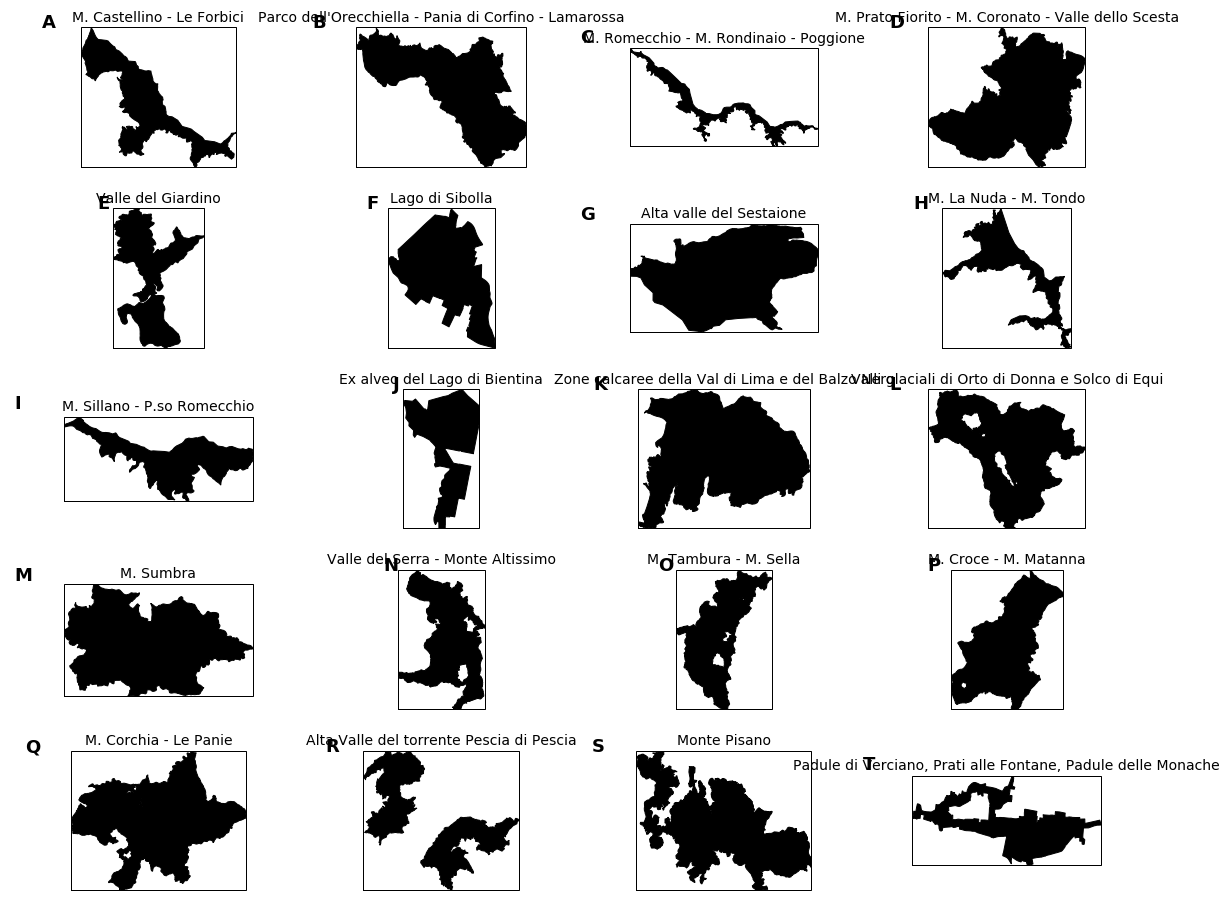

In [52]:
%%opts Layout [fig_rcparams={'axes.titlesize': 14}]
hv.Layout(
    [make_shape(gs, crs=ccrs.epsg(code=3003)).relabel(label=gs.NOME_left) for (i, gs) in sic_lucca.iterrows()]
).cols(4)

In [53]:
sic_count = merged.groupby('Province')[['SIC']].count().rename(columns={'SIC': 'SIC_count'})
sic_count = sic_count.sort_values(by='SIC_count', ascending=False)
sic_count.index.name = 'Province'
sic_count

SIC_count
Province                
GROSSETO              20
LUCCA                 20
AREZZO                15
FIRENZE               14
MASSA-CARRARA         11
SIENA                 11
PISA                   8
PISTOIA                8
LIVORNO                7
PRATO                  4

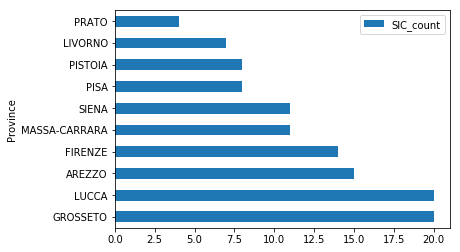

In [64]:
sic_count.plot.barh()

We can plot the sites of Community importance all together, colored by province.

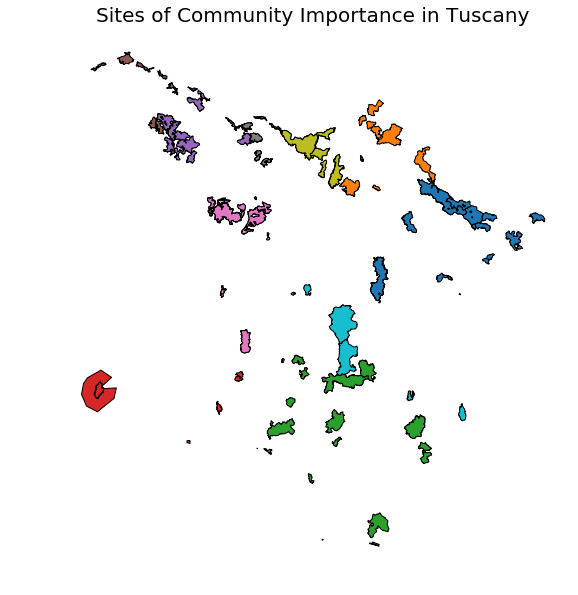

In [55]:
merged_3857 = merged.to_crs(epsg=3857)
ax = merged_3857.plot(figsize=(10, 10), column='Province', alpha=1.0, edgecolor='k', cmap='tab10')
ax.set_axis_off()
extent_tuscany = ax.axis()
ax.set_title('Sites of Community Importance in Tuscany', fontsize=20);

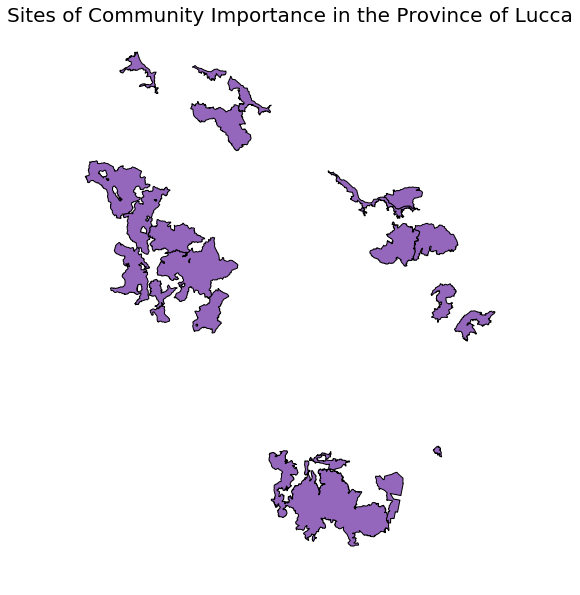

In [56]:
sic_in_lucca = merged[merged.Province == 'LUCCA']
sic_in_lucca_3857 = sic_in_lucca.to_crs(epsg=3857)
ax = sic_in_lucca.plot(figsize=(10, 10), facecolor='#9467bd', edgecolor='k')
ax.set_axis_off()
extent_lucca = ax.axis()
ax.set_title('Sites of Community Importance in the Province of Lucca', fontsize=20);

In [57]:
def add_basemap(ax, zoom=10, url=ctx.sources.ST_TERRAIN):
    """Add a background map to an existing plot.
    
    See Also:
    https://gist.github.com/jorisvandenbossche/2b9ce4856b403623e1ca6760112cab87
    """
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

CPU times: user 363 ms, sys: 4.9 ms, total: 367 ms
Wall time: 1.69 s


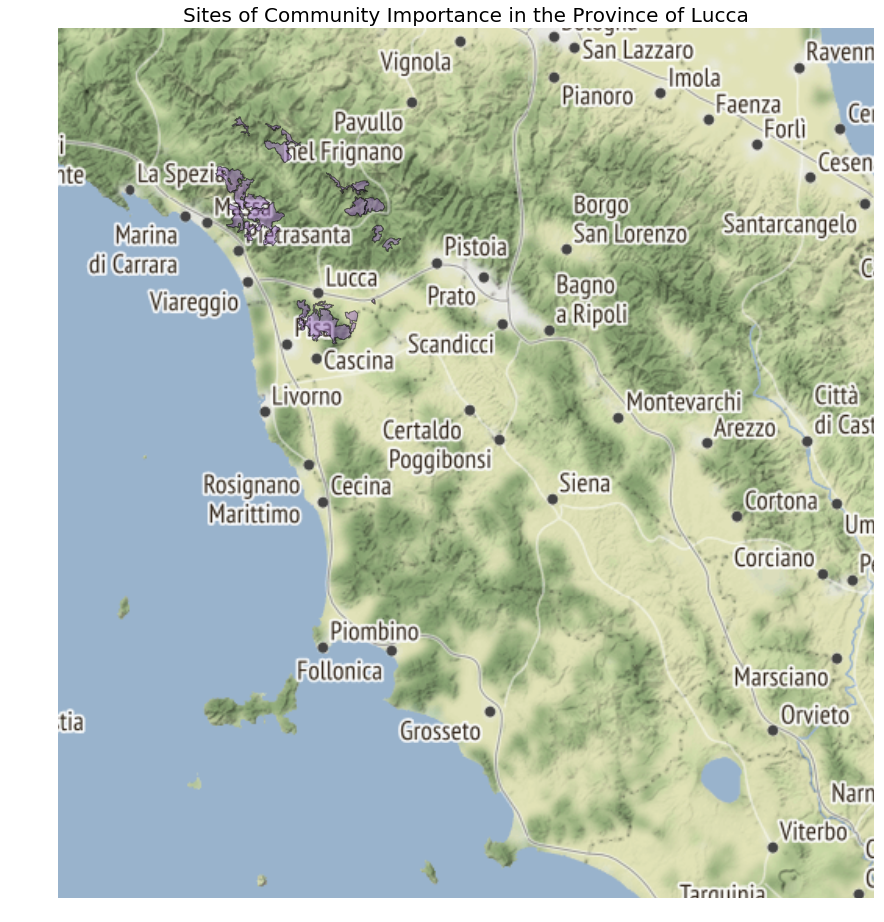

In [58]:
%%time
fig, ax = plt.subplots(figsize=(16, 16))
sic_in_lucca_3857.plot(ax=ax, color='#9467bd', edgecolor='black', alpha=0.5)
ax.axis(extent_tuscany)
add_basemap(ax, zoom=8)
ax.set_axis_off()
ax.set_title('Sites of Community Importance in the Province of Lucca', fontsize=20);

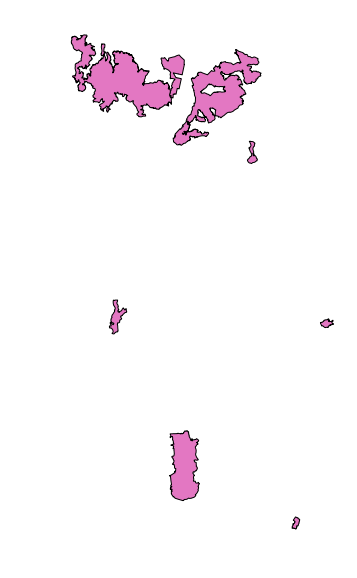

In [61]:
sic_in_pisa = merged[merged.Province == 'PISA']
sic_in_pisa_3857 = sic_in_pisa.to_crs(epsg=3857)
ax = sic_in_pisa_3857.plot(figsize=(10, 10), facecolor='#e377c2', edgecolor='k')
ax.set_axis_off()
extent_pisa = ax.axis()

CPU times: user 128 ms, sys: 559 µs, total: 128 ms
Wall time: 452 ms


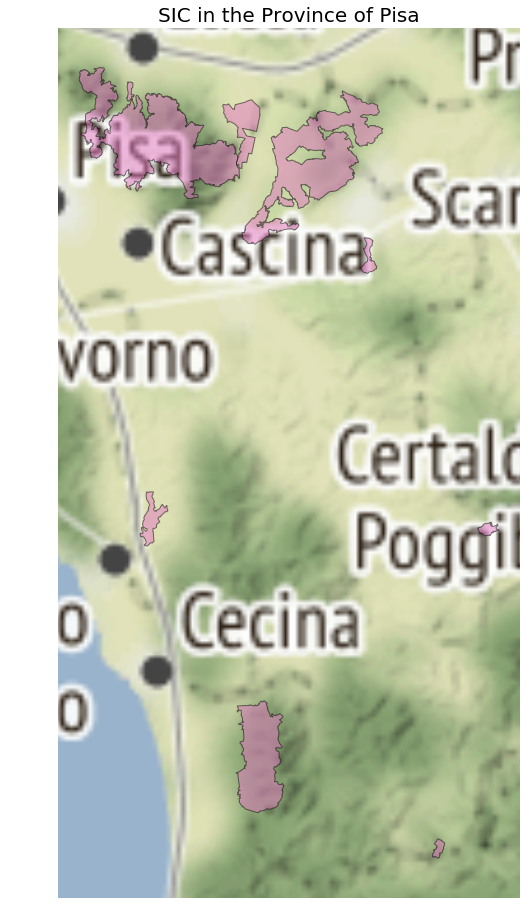

In [62]:
%%time
fig, ax = plt.subplots(figsize=(16, 16))
sic_in_pisa_3857.plot(ax=ax, color='#e377c2', edgecolor='black', alpha=0.5)
ax.axis(extent_pisa)
add_basemap(ax, zoom=8)
ax.set_axis_off()
ax.set_title('SIC in the Province of Pisa', fontsize=20);

CPU times: user 421 ms, sys: 45.1 ms, total: 466 ms
Wall time: 10.2 s


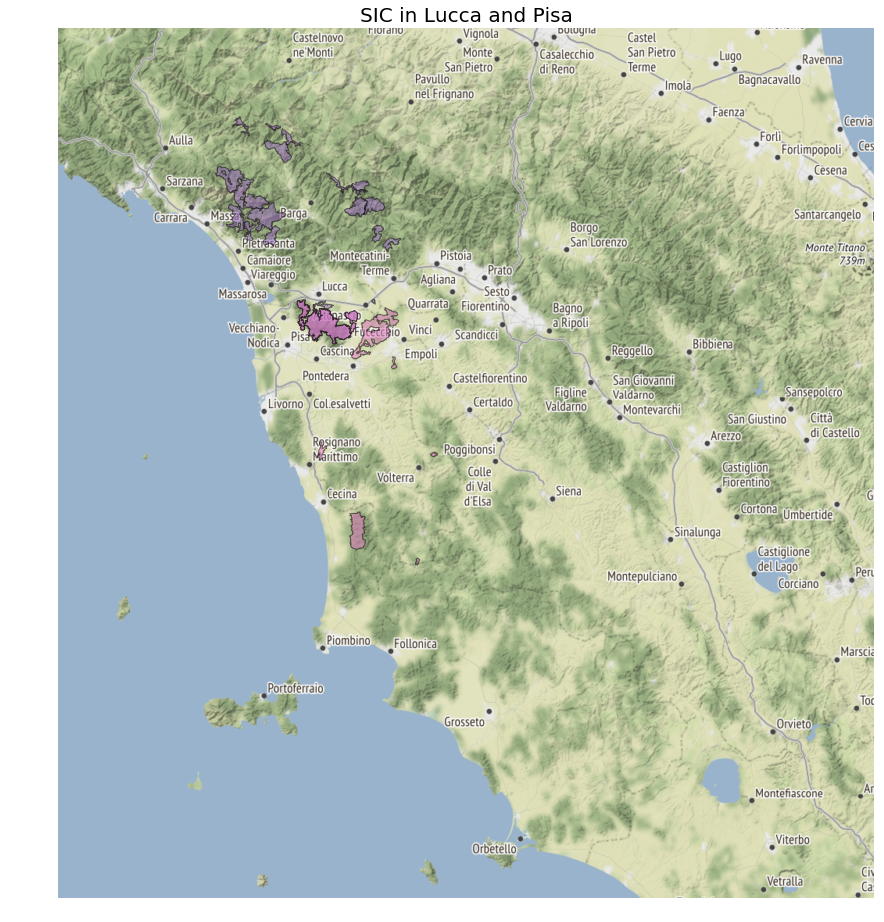

In [63]:
%%time
fig, ax = plt.subplots(figsize=(16, 16))
# ax.set_aspect('equal')
sic_in_lucca_3857.plot(ax=ax, color='#9467bd', edgecolor='black', alpha=0.5)
sic_in_pisa_3857.plot(ax=ax, color='#e377c2', edgecolor='black', alpha=0.5)
ax.axis(extent_tuscany)
add_basemap(ax, zoom=9)
ax.set_axis_off()
ax.set_title('SIC in Lucca and Pisa', fontsize=20);

## Other interesting datasets

- Aree protette: http://dati.toscana.it/dataset/arprot/resource/c3c00744-d5d7-42ce-ad00-ee03fb6a652d
- Aree protette e alberi monumentali: http://dati.toscana.it/dataset/arprot
- Siti di Interesse Regionale, Siti di Importanza Comunitaria, Zone di Protezione Speciale: http://dati.toscana.it/dataset/sir
- Zone DOP e IGP: http://dati.toscana.it/dataset/zonedopigp
- Limiti amministrativi http://dati.toscana.it/dataset/amb-amm

## TODO

- save SIC as GeoJSON and/or TopoJSON
- save SIC in a SPatialite database. How to save a SIC that belongs to 2 provinces?